In [105]:
# Import all the required libraries 

from glob import glob
import mne
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats
from scipy import signal
from scipy import fftpack
import pywt
import os,sys
from scipy.signal import coherence

In [106]:
powers_df = pd.read_excel("F:\Alabama_Internship\EEG\Deepesh Code\Dataset_window_multitaper.xlsx")

In [107]:
theta_pre = []
theta_post = []
beta_pre = []
beta_post = []


for i in range(64):
    theta_pre.append((powers_df['theta' + str(i + 1)].tolist())[:20])
    theta_post.append((powers_df['theta' + str(i + 1)].tolist())[20:])
    beta_pre.append((powers_df['beta' + str(i + 1)].tolist())[:20])
    beta_post.append((powers_df['beta' + str(i + 1)].tolist())[20:])

In [108]:
ratio_pre = []
ratio_post = []
for i in range(64):
    temp_pre = []
    temp_post =[]
    for j in range(20):
        temp_pre.append(theta_pre[i][j] / beta_pre[i][j])
        temp_post.append(theta_post[i][j] / beta_post[i][j])
    ratio_pre.append(temp_pre)
    ratio_post.append(temp_post)

In [109]:
def compute_ttest(pre, post):
    results = []
    for i in range(64):
        results.append(stats.ttest_rel(pre[i], post[i]))
        if(results[i].pvalue <= 0.05):
            print(i + 1)

compute_ttest(ratio_pre, ratio_post)

In [110]:
ratio_pre_mean = [0] * 20
ratio_post_mean = [0] * 20

for i in range(20):
    for j in range(64):
        ratio_pre_mean[i] += ratio_pre[j][i]
        ratio_post_mean[i] += ratio_post[j][i]
    ratio_pre_mean[i] /= 64
    ratio_post_mean[i] /= 64

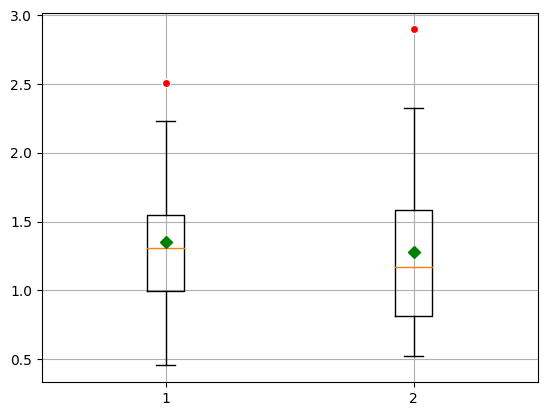

In [111]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot([ratio_pre_mean, ratio_post_mean], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.grid()
plt.show()

In [112]:
ratio_pre = np.array(ratio_pre).T
ratio_post = np.array(ratio_post).T

cols = []
for i in range(64):
    cols.append("channel" + str(i + 1))

cols.append("target")
target = ([1] * 20) + ([0] * 20)
target = np.array(target).reshape(-1, 1)

combined = np.concatenate((ratio_pre, ratio_post))
combined = np.concatenate((combined, target), 1)
combined.shape

(40, 65)

In [113]:
df = pd.DataFrame(combined, columns = cols, dtype = float)
df.to_excel('Dataset_multitaper_theta_beta_ratio.xlsx')